<a href="https://colab.research.google.com/github/PanitnanKan/BADS7105-CRM-analysis-and-intelligence/blob/main/Homework%2006/Homework_6_custering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('Supermarket Data.csv')
df.dropna(inplace = True)
df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200732,20071005,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,9.941078e+14,L,MM,Top Up,Grocery,STORE00001,LS,E02
1,200733,20071010,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,9.941079e+14,L,MM,Full Shop,Fresh,STORE00001,LS,E02
2,200741,20071209,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,9.941087e+14,L,MM,Full Shop,Grocery,STORE00001,LS,E02
3,200731,20070929,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,9.941077e+14,L,LA,Full Shop,Mixed,STORE00001,LS,E02
6,200731,20070929,7,18,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,9.941077e+14,L,MM,Full Shop,Fresh,STORE00001,LS,E02


In [ ]:
total_spend = df.groupby(['CUST_CODE']).sum()["SPEND"]
total_visit = df.groupby(['CUST_CODE'])['BASKET_ID'].nunique()
total_quantity = df.groupby(['CUST_CODE']).sum()["QUANTITY"]
mean_quantity = df.groupby(['CUST_CODE']).mean()["QUANTITY"]
mean_spend = df.groupby(['CUST_CODE']).mean()["SPEND"]
total_spend_list = total_spend.tolist()
total_visit_list = total_visit.tolist()
total_quantity_list = total_quantity.tolist()
mean_quantity_list = mean_quantity.tolist()
mean_spend_list = mean_spend.tolist()

In [ ]:
cust = df.groupby(['CUST_CODE'], as_index=False).count()
cust['total_spend'] = total_spend_list
cust['total_visit'] = total_visit_list
cust['total_quantity'] = total_quantity_list
cust['avg_quantity'] = mean_quantity_list
cust['avg_spend'] = mean_spend_list
cust = cust.drop(['SHOP_WEEK', 'SHOP_DATE','SHOP_WEEKDAY','SHOP_HOUR','QUANTITY','SPEND','PROD_CODE','PROD_CODE_10','PROD_CODE_20', 'PROD_CODE_30','PROD_CODE_40','CUST_PRICE_SENSITIVITY','CUST_LIFESTAGE','BASKET_ID','BASKET_SIZE','BASKET_PRICE_SENSITIVITY','BASKET_TYPE','BASKET_DOMINANT_MISSION','STORE_CODE','STORE_FORMAT','STORE_REGION'], axis=1)
cust.info()
cust.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2252
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CUST_CODE       2253 non-null   object 
 1   total_spend     2253 non-null   float64
 2   total_visit     2253 non-null   int64  
 3   total_quantity  2253 non-null   int64  
 4   avg_quantity    2253 non-null   float64
 5   avg_spend       2253 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 123.2+ KB


,CUST_CODE,total_spend,total_visit,total_quantity,avg_quantity,avg_spend
0,CUST0000001194,282.18,68,219,1.386076,1.785949
1,CUST0000002605,1.80,6,6,1.000000,0.300000
2,CUST0000002637,35.78,13,26,1.181818,1.626364
3,CUST0000002638,1.57,1,1,1.000000,1.570000
4,CUST0000002813,41.95,11,40,1.212121,1.271212


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

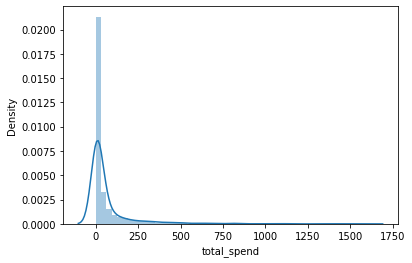

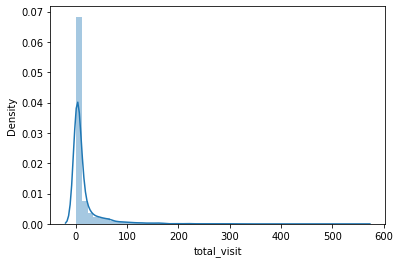

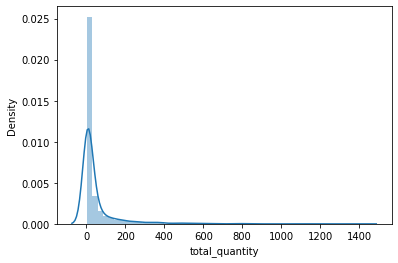

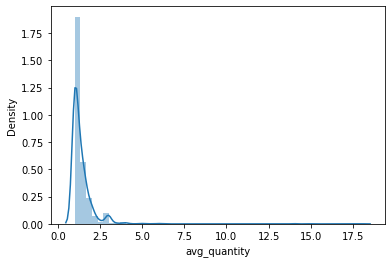

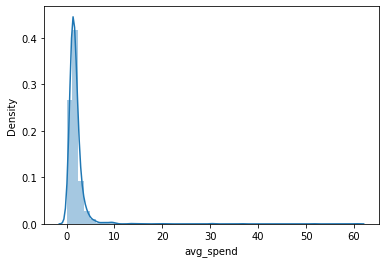

In [ ]:
for i, col in enumerate(cust.columns[1:]):
    plt.figure(i)
    sns.distplot(cust[col])
    
plt.show()

In [ ]:
cust_std = pd.DataFrame(StandardScaler().fit_transform(cust[cust.columns[1:]]))
cust_std

,0,1,2,3,4
0,1.349064,1.586965,1.437700,-0.011190,-0.054671
1,-0.420312,-0.281785,-0.382910,-0.483777,-0.674955
2,-0.205877,-0.070798,-0.211960,-0.261217,-0.121287
3,-0.421764,-0.432491,-0.425647,-0.483777,-0.144815
4,-0.166940,-0.131080,-0.092296,-0.224124,-0.269539
...,...,...,...,...,...
2248,0.269945,0.290896,0.471837,-0.266163,-0.284516
2249,-0.415769,-0.432491,-0.417100,-0.483777,-0.274219
2250,0.011209,0.260755,0.155581,-0.276306,-0.303652
2251,-0.018514,-0.070798,0.061558,-0.228761,-0.230824


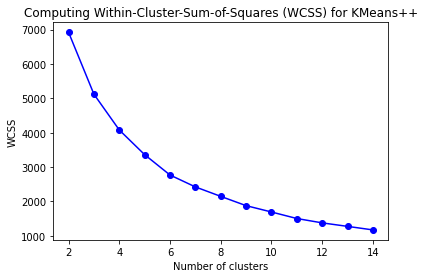

In [ ]:
wcss = []
N = range(2, 15)
for i in N:
    kmeans = KMeans(n_clusters=i) 
    kmeans.fit_predict(cust_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(N, wcss, 'bo-')
plt.title("Computing Within-Cluster-Sum-of-Squares (WCSS) for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()



In [ ]:
cluster = KMeans(n_clusters=7)
cust['cluster'] = cluster.fit_predict(cust_std)
cust

,CUST_CODE,total_spend,total_visit,total_quantity,avg_quantity,avg_spend,cluster
0,CUST0000001194,282.18,68,219,1.386076,1.785949,2
1,CUST0000002605,1.80,6,6,1.000000,0.300000,0
2,CUST0000002637,35.78,13,26,1.181818,1.626364,0
3,CUST0000002638,1.57,1,1,1.000000,1.570000,0
4,CUST0000002813,41.95,11,40,1.212121,1.271212,0
...,...,...,...,...,...,...,...
2248,CUST0000999024,111.18,25,106,1.177778,1.235333,4
2249,CUST0000999109,2.52,1,2,1.000000,1.260000,0
2250,CUST0000999593,70.18,24,69,1.169492,1.189492,4
2251,CUST0000999935,65.47,13,58,1.208333,1.363958,4


In [ ]:
dfCluster = cust.groupby('cluster', as_index=False).mean()
dfCluster['NO_CUST'] = cust[['cluster','CUST_CODE']].groupby('cluster').count()

dfCluster

,cluster,total_spend,total_visit,total_quantity,avg_quantity,avg_spend,NO_CUST
0,0,23.996529,6.710618,18.205368,1.184419,1.548711,1714
1,1,314.563636,68.703349,234.488038,1.388340,1.894684,209
2,2,5.476667,1.333333,19.000000,14.333333,4.636667,3
3,3,60.038000,1.400000,9.200000,7.000000,41.890000,5
4,4,25.613069,3.833935,17.317690,2.449613,3.442148,277
5,5,885.078444,169.933333,651.911111,1.480579,2.033374,45


<Figure size 432x288 with 0 Axes>

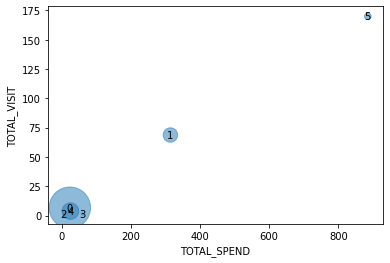

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
fig, ax = plt.subplots()
ax.scatter(dfCluster['total_spend'], dfCluster['total_visit'], s=dfCluster['NO_CUST'], alpha = 0.5)
ax.set_xlabel("TOTAL_SPEND")
ax.set_ylabel("TOTAL_VISIT")

for i, txt in enumerate(dfCluster['cluster']):
  ax.annotate(txt, (dfCluster['total_spend'][i], dfCluster["total_visit"][i]), horizontalalignment='center', verticalalignment='center')

plt.show()

<Figure size 432x288 with 0 Axes>

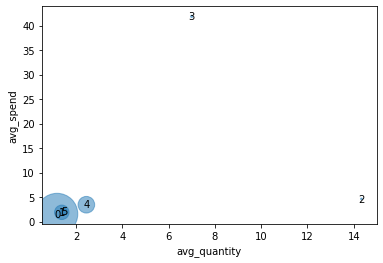

In [ ]:
plt.figure()
fig, ax = plt.subplots()
ax.scatter(dfCluster['avg_quantity'], dfCluster['avg_spend'], s=dfCluster['NO_CUST'], alpha = 0.5)
ax.set_xlabel("avg_quantity")
ax.set_ylabel("avg_spend")

for i, txt in enumerate(dfCluster['cluster']):
  ax.annotate(txt, (dfCluster['avg_quantity'][i], dfCluster["avg_spend"][i]), horizontalalignment='center', verticalalignment='center')

plt.show()

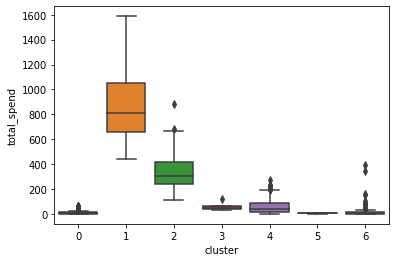

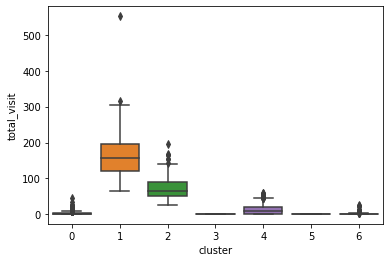

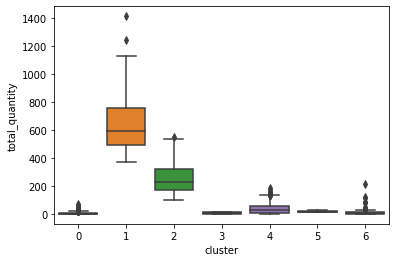

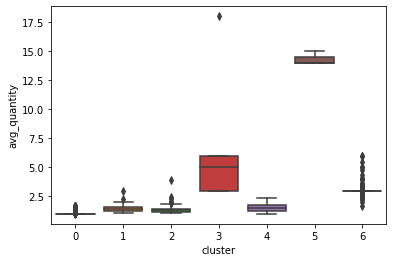

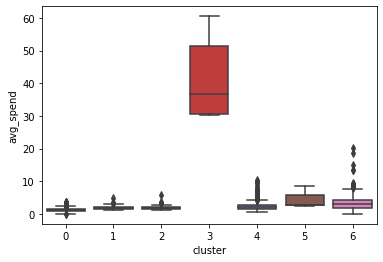

In [26]:
for i, col in enumerate(cust.columns[1:-1]):
    sns.boxplot(x="cluster", y =col, data=cust)
    plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier

predictors = cust.iloc[:,1:-1]
targets = cust.iloc[:,-1:]

scaler = StandardScaler()
predictors_scaled = scaler.fit_transform(predictors)

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(predictors_scaled, targets.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [28]:
importances = list(classifier.feature_importances_)

feature_list = list(predictors.columns)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: avg_quantity         Importance: 0.36
Variable: total_spend          Importance: 0.32
Variable: total_quantity       Importance: 0.14
Variable: avg_spend            Importance: 0.12
Variable: total_visit          Importance: 0.06
